# CS 574 Final Project: Predicting Housing Prices Using Boston Dataset

## Part 1: Dataset import, setup, cleaning, and description

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
boston_data_url = "/Users/iangonzalez/Desktop/CS574FinalProject/boston_data_1.csv"

In [31]:
boston_data_unclean = pd.read_csv(boston_data_url)

In [32]:
boston_data_unclean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

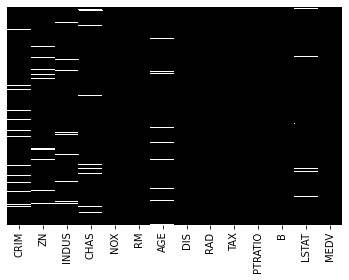

In [33]:
sns.heatmap(boston_data_unclean.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')

In [5]:
boston_data_unclean.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Columns:

### CRIM - per capita crime rate by town
### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS - proportion of non-retail business acres per town.
### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
### NOX - nitric oxides concentration (parts per 10 million)
### RM - average number of rooms per dwelling
### AGE - proportion of owner-occupied units built prior to 1940
### DIS - weighted distances to five Boston employment centres
### RAD - index of accessibility to radial highways
### TAX - full-value property-tax rate per 10,000 USD
### PTRATIO - pupil-teacher ratio by town
### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
### LSTAT - % lower status of the population
### MEDV - Median value of owner-occupied homes in USD 1000's

In [6]:
boston_data_unclean.columns #lists all columns in this dataset.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
boston_data_unclean.isna().any() #returns true if there are null values, false otherwise

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [23]:
axis = 0 #axis being equal to zero means "drop all rows which contain empty values". axis being equal to 1 means "drop all columns which contain empty values"
boston_data = boston_data_unclean.dropna(axis)

In [24]:
boston_data.isna().any() #returns false for all columns because all the rows with null values have been eliminated

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

## Part 2: Decision Tree

In [26]:
y = boston_data.MEDV
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64